In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from scipy.stats import probplot 

In [2]:
%matplotlib inline

# Exploratory Data Analysis With Duplicates

In [3]:
df = pd.read_csv("UG90 PROJECT.csv") #Create a data frame containing the PGE prject data

In [4]:
df.describe() #View summary statistics of the df contents 

,X,Y,Z,DENSITY,PGE,CU,NI,PT,PD,RH,AU
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000
mean,60390.438526,-181274.546351,799.118544,3.948201,5.761927,0.018254,0.120061,3.279696,1.919703,0.471981,0.090552
std,2124.025870,1538.658690,169.468457,0.248850,2.200833,0.013086,0.039013,1.026698,1.079530,0.174884,0.060147
min,56836.510000,-185779.020000,288.670000,3.211100,1.123800,0.001600,0.027100,0.742100,0.094600,0.035100,0.013100
25%,58380.050000,-182447.772500,696.915000,3.750025,4.265150,0.008600,0.091800,2.541500,1.132400,0.338800,0.045550
50%,60123.965000,-181299.685000,808.045000,3.967300,5.904950,0.014500,0.120100,3.466900,1.898900,0.484250,0.083650
75%,62278.972500,-179962.467500,926.397500,4.133425,7.165025,0.025050,0.146900,3.992250,2.520375,0.594525,0.119250
max,64758.170000,-178135.470000,1101.950000,4.600100,14.875000,0.080900,0.276900,7.342600,6.722600,1.128500,0.588100


In [5]:
len(df) #Check the length of the df

570

## Location Maps

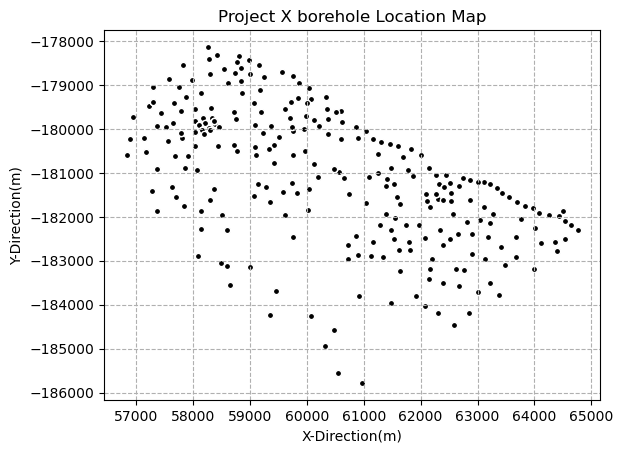

In [6]:
plt.scatter(df['X'], df['Y'], c = 'black', s = 20, 
            edgecolors = 'white')
plt.title("Project X borehole Location Map")
plt.xlabel("X-Direction(m)")
plt.ylabel("Y-Direction(m)")
plt.grid(linestyle = '--')
plt.show()

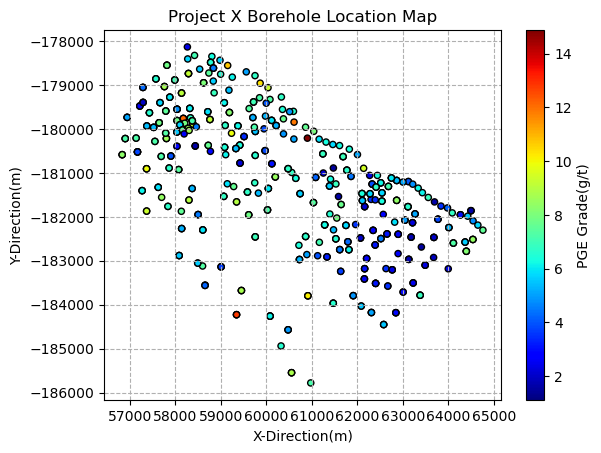

In [8]:
plt.scatter(df['X'], df['Y'], c = df['PGE'], s = 20, 
            edgecolors = 'k', cmap = 'jet')
cbar = plt.colorbar()
cbar.set_label("PGE Grade(g/t)", loc = 'center')
plt.title("Project X Borehole Location Map")
plt.xlabel("X-Direction(m)")
plt.ylabel("Y-Direction(m)")
plt.grid(linestyle = '--')
plt.show()

## Checking for duplicates

In [9]:
# Checking for boreholes with exactly the same coordinates
exact_same_coordinates = df.duplicated(subset=['X', 'Y'], keep=False)
boreholes_with_same_coordinates = df[exact_same_coordinates]

# Counting the number of such boreholes
num_boreholes_with_same_coordinates = boreholes_with_same_coordinates.shape[0]
num_boreholes_with_same_coordinates, boreholes_with_same_coordinates

(6,
        BHID         X          Y       Z  DENSITY     PGE      CU      NI  \
 135  WA36D1  62864.15 -181625.45  937.03   4.1977  7.5552  0.0375  0.1531   
 136  WA36D2  62864.15 -181625.45  937.01   4.2415  8.3516  0.0334  0.1479   
 301  WW20D0  57693.09 -180625.31  627.44   3.6741  6.1055  0.0240  0.1093   
 302  WW20D1  57693.09 -180625.31  627.39   3.6885  7.2038  0.0188  0.0901   
 388  WW59D0  57295.25 -179397.25  746.56   3.2111  2.2010  0.0092  0.0723   
 389  WW59D1  57295.25 -179397.25  746.31   3.2852  2.4470  0.0100  0.0797   
 
          PT      PD      RH      AU  
 135  4.2191  2.6507  0.6034  0.0820  
 136  4.5573  3.0302  0.6843  0.0798  
 301  3.1002  2.3859  0.4820  0.1373  
 302  3.4921  3.0746  0.4962  0.1409  
 388  1.4963  0.4621  0.2134  0.0292  
 389  1.7251  0.4338  0.2619  0.0262  )

In [10]:
boreholes_with_same_coordinates[['BHID','X','Y','Z','PGE']]

,BHID,X,Y,Z,PGE
135,WA36D1,62864.15,-181625.45,937.03,7.5552
136,WA36D2,62864.15,-181625.45,937.01,8.3516
301,WW20D0,57693.09,-180625.31,627.44,6.1055
302,WW20D1,57693.09,-180625.31,627.39,7.2038
388,WW59D0,57295.25,-179397.25,746.56,2.2010
389,WW59D1,57295.25,-179397.25,746.31,2.4470


### Plotting duplicates

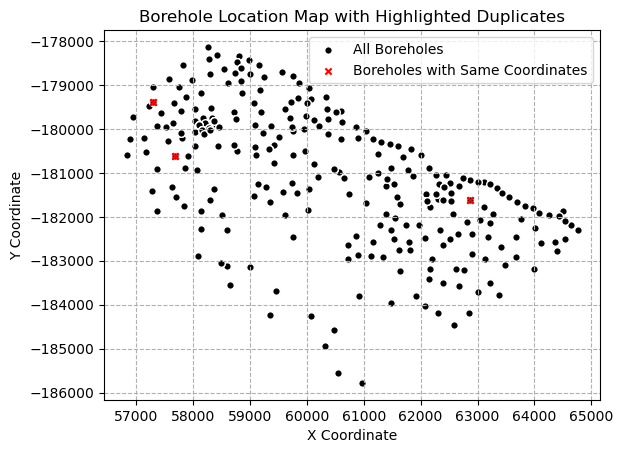

In [11]:
plt.scatter(df['X'], df['Y'], color='black', marker='o', label='All Boreholes', s = 30, 
            edgecolor = 'white')

# Highlighting boreholes with the same coordinates
plt.scatter(boreholes_with_same_coordinates['X'], boreholes_with_same_coordinates['Y'], 
            color='red', marker='x', s=20, label='Boreholes with Same Coordinates')

plt.title('Borehole Location Map with Highlighted Duplicates')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.grid(ls = '--')
plt.show()

### Dealing with duplicates

In [12]:
# Increasing the X and Y coordinates by 0.001
df_mod = df.copy()
df_mod['X'] = df['X'] + 0.001
df_mod['Y'] = df['Y'] + 0.001

In [13]:
#checking if df and df_mod are the same
equal = df_mod.equals(df)
print('DataFrames are equal:', equal)

DataFrames are equal: False


# Exploratory Data Analysis with duplicates removed

## Location map and grade segmentation into ranges

In [14]:
# Defining the color ranges for PGE values
conditions = [
    (df_mod['PGE'] >= 0) & (df_mod['PGE'] < 3),
    (df_mod['PGE'] >= 3) & (df_mod['PGE'] < 7),
    (df_mod['PGE'] >= 7) & (df_mod['PGE'] <= 15)
]

# Defining the colors for each range
colors = ['blue', 'green', 'red']

# Applying the conditions to assign colors
df_mod['color'] = np.select(conditions, colors)

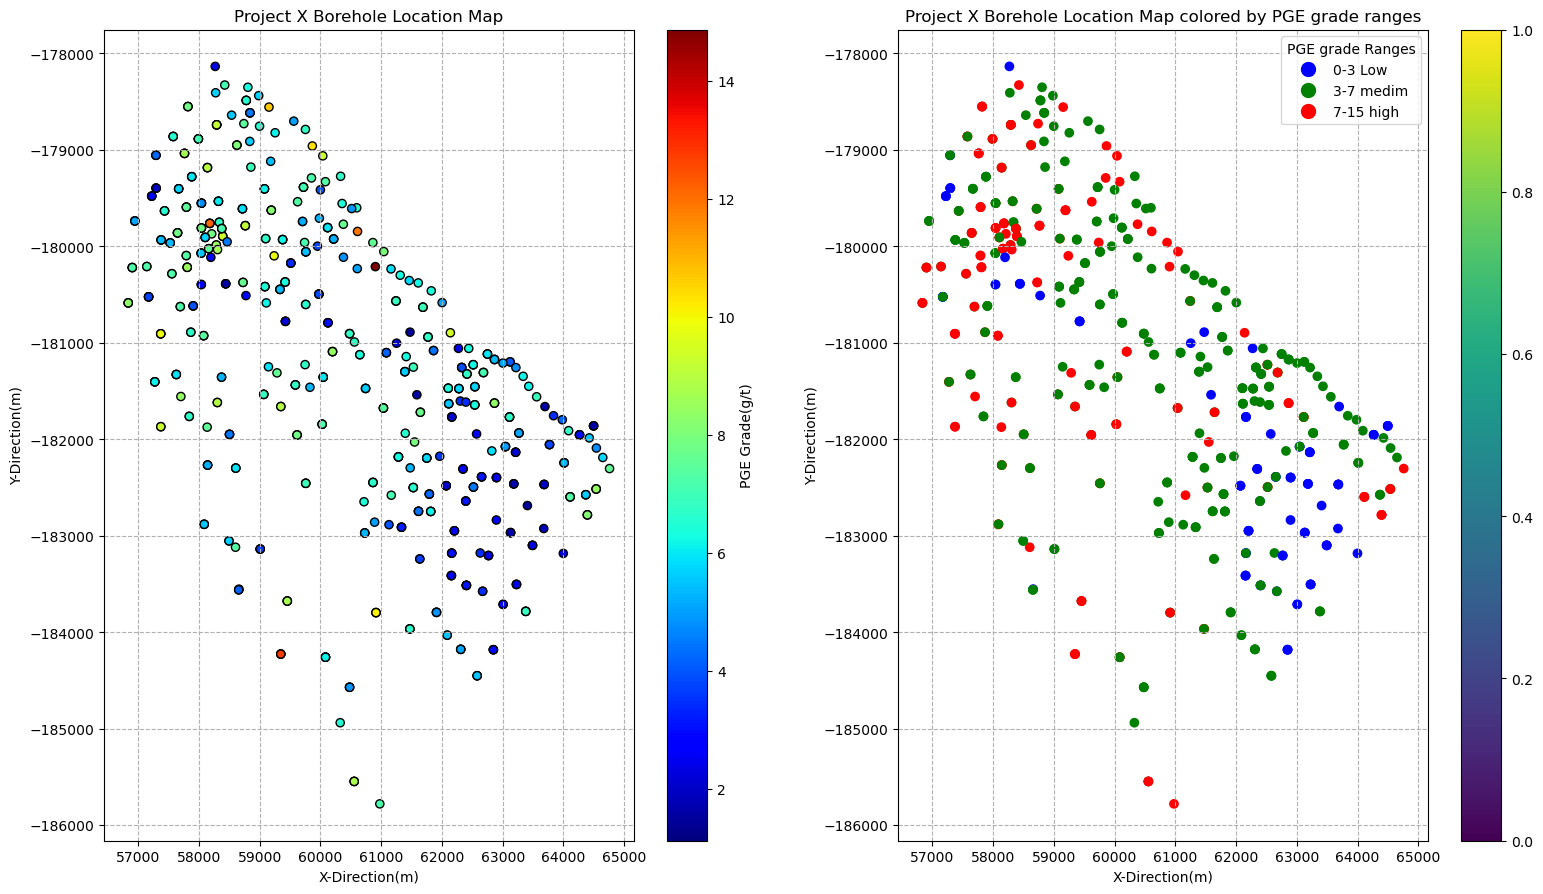

In [15]:
plt.subplot(1,2,2)
# Scatter plot
scatter = plt.scatter(df_mod['X'], df_mod['Y'], c=df_mod['color'], marker='o')

# Creating a legend
color_labels = ['0-3 Low', '3-7 medim', '7-15 high']
color_map = {color: label for color, label in zip(colors, color_labels)}
patches = [plt.plot([],[], marker="o", ms=10, ls="", mec=None, color=color, 
            label="{:s}".format(label))[0] for color, label in color_map.items()]
plt.legend(handles=patches, title="PGE grade Ranges", loc='upper right', frameon=True)

cbar = plt.colorbar()
plt.title('Project X Borehole Location Map colored by PGE grade ranges')
plt.xlabel('X-Direction(m)')
plt.ylabel('Y-Direction(m)')
plt.grid(ls = '--')

plt.subplot(1,2,1)
plt.scatter(df['X'], df['Y'], c = df['PGE'], s = 35, 
            edgecolors = 'k',cmap = 'jet')
cbar = plt.colorbar()
cbar.set_label("PGE Grade(g/t)", loc = 'center')
plt.title("Project X Borehole Location Map")
plt.xlabel("X-Direction(m)")
plt.ylabel("Y-Direction(m)")
plt.grid(linestyle = '--')

plt.subplots_adjust(right = 2.4, hspace=0.1, top = 1.8)
plt.show()

## Descriptive Statistics

In [16]:
def coefficient_of_variation(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    cv = (std_dev / mean) 
    return cv

In [17]:
# Calculating the requested descriptive statistics for PGE values
pge_descriptive_stats = {
    'Mean': df_mod['PGE'].mean(),
    'Median': df_mod['PGE'].median(),
    'Mode': df_mod['PGE'].mode()[0],  # The mode() function can return multiple values; we take the first one
    'Standard Deviation': df_mod['PGE'].std(),
    'Sample Variance': df_mod['PGE'].var(),
    'Kurtosis': df_mod['PGE'].kurtosis(),
    'Skewness': df_mod['PGE'].skew(),
    'Range': df_mod['PGE'].max() - df_mod['PGE'].min(),
    'Minimum': df_mod['PGE'].min(),
    'Maximum': df_mod['PGE'].max(),
    'CoV': coefficient_of_variation(df_mod['PGE']),
    'Count': len(df_mod['PGE'])
}

In [18]:
# Converting the dictionary to a DataFrame for better presentation
pge_descriptive_stats_df = pd.DataFrame(pge_descriptive_stats, index=['PGE']).round(decimals = 3)
pge_descriptive_stats_df.transpose()

,PGE
Mean,5.762
Median,5.905
Mode,2.201
Standard Deviation,2.201
Sample Variance,4.844
Kurtosis,0.440
Skewness,0.200
Range,13.751
Minimum,1.124
Maximum,14.875


## EDA Visualisations

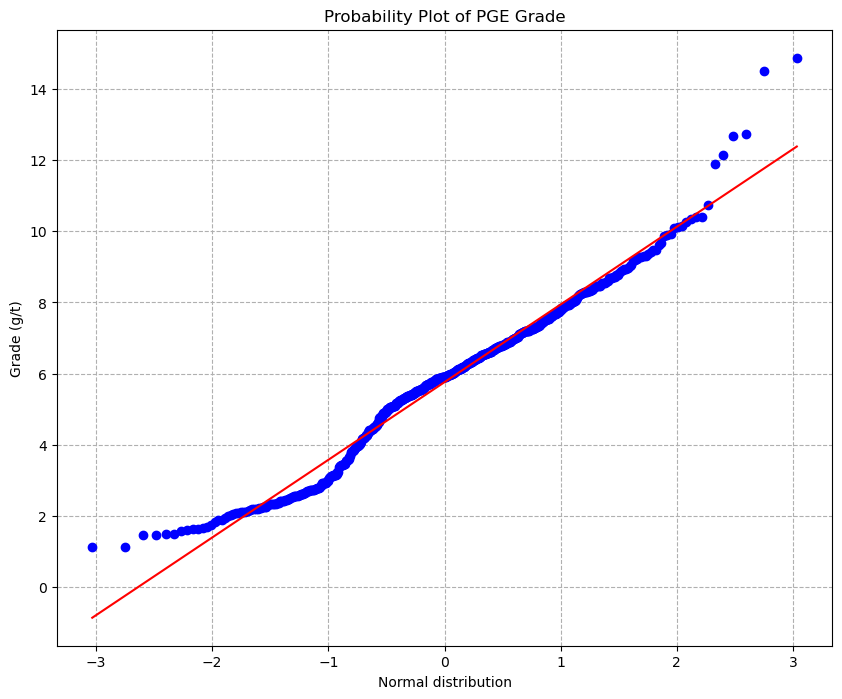

In [24]:
PGE = df_mod['PGE']

# Create a probability plot
plt.figure(figsize=(10,8))
probplot(PGE, plot=plt)


plt.title('Probability Plot of PGE Grade')
plt.xlabel('Normal distribution')
plt.ylabel('Grade (g/t)')



plt.grid(ls = '--')
plt.show()

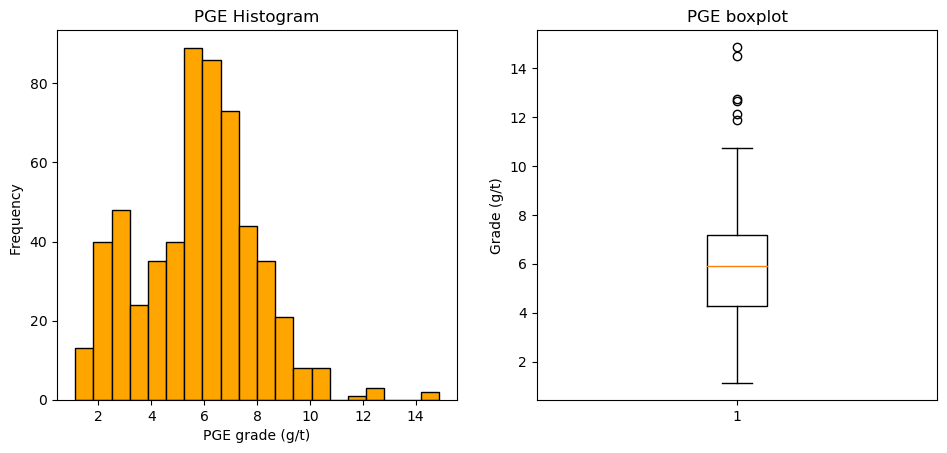

In [28]:
plt.subplot(1,2,1)
plt.hist(df_mod['PGE'], color ='orange', edgecolor = 'black', bins = 20)
plt.title('PGE Histogram')
plt.xlabel('PGE grade (g/t)')
plt.ylabel('Frequency  ')



plt.subplot(1,2,2)
plt.boxplot(df_mod['PGE'])
plt.title('PGE boxplot')
plt.ylabel('Grade (g/t)')



plt.subplots_adjust(right = 1.5, hspace=0.5)
plt.show()

## PGE Compsition

In [37]:
# Select PGE elements to be used to create a correlation matrix
pge_comp = df_mod[['PGE','PT','PD', 'RH','AU', 'CU', 'NI', 'DENSITY']]
pc = pge_comp.corr()

In [38]:
pc

,PGE,PT,PD,RH,AU,CU,NI,DENSITY
PGE,1.000000,0.952107,0.951026,0.908166,0.628817,0.408281,0.593935,0.681132
PT,0.952107,1.000000,0.812246,0.927937,0.492217,0.292813,0.526155,0.740969
PD,0.951026,0.812246,1.000000,0.786555,0.698823,0.478221,0.591553,0.551577
RH,0.908166,0.927937,0.786555,1.000000,0.366058,0.267341,0.559233,0.701064
AU,0.628817,0.492217,0.698823,0.366058,1.000000,0.580624,0.507912,0.336798
CU,0.408281,0.292813,0.478221,0.267341,0.580624,1.000000,0.756059,0.276115
NI,0.593935,0.526155,0.591553,0.559233,0.507912,0.756059,1.000000,0.532118
DENSITY,0.681132,0.740969,0.551577,0.701064,0.336798,0.276115,0.532118,1.000000


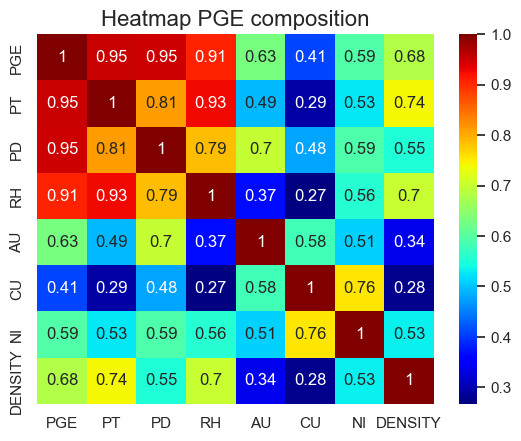

In [39]:
sns.set()

ax = sns.heatmap(pc, annot = True, cmap = 'jet')
ax.set_title('Heatmap PGE composition', fontsize=16)
plt.savefig('heatmap.png')

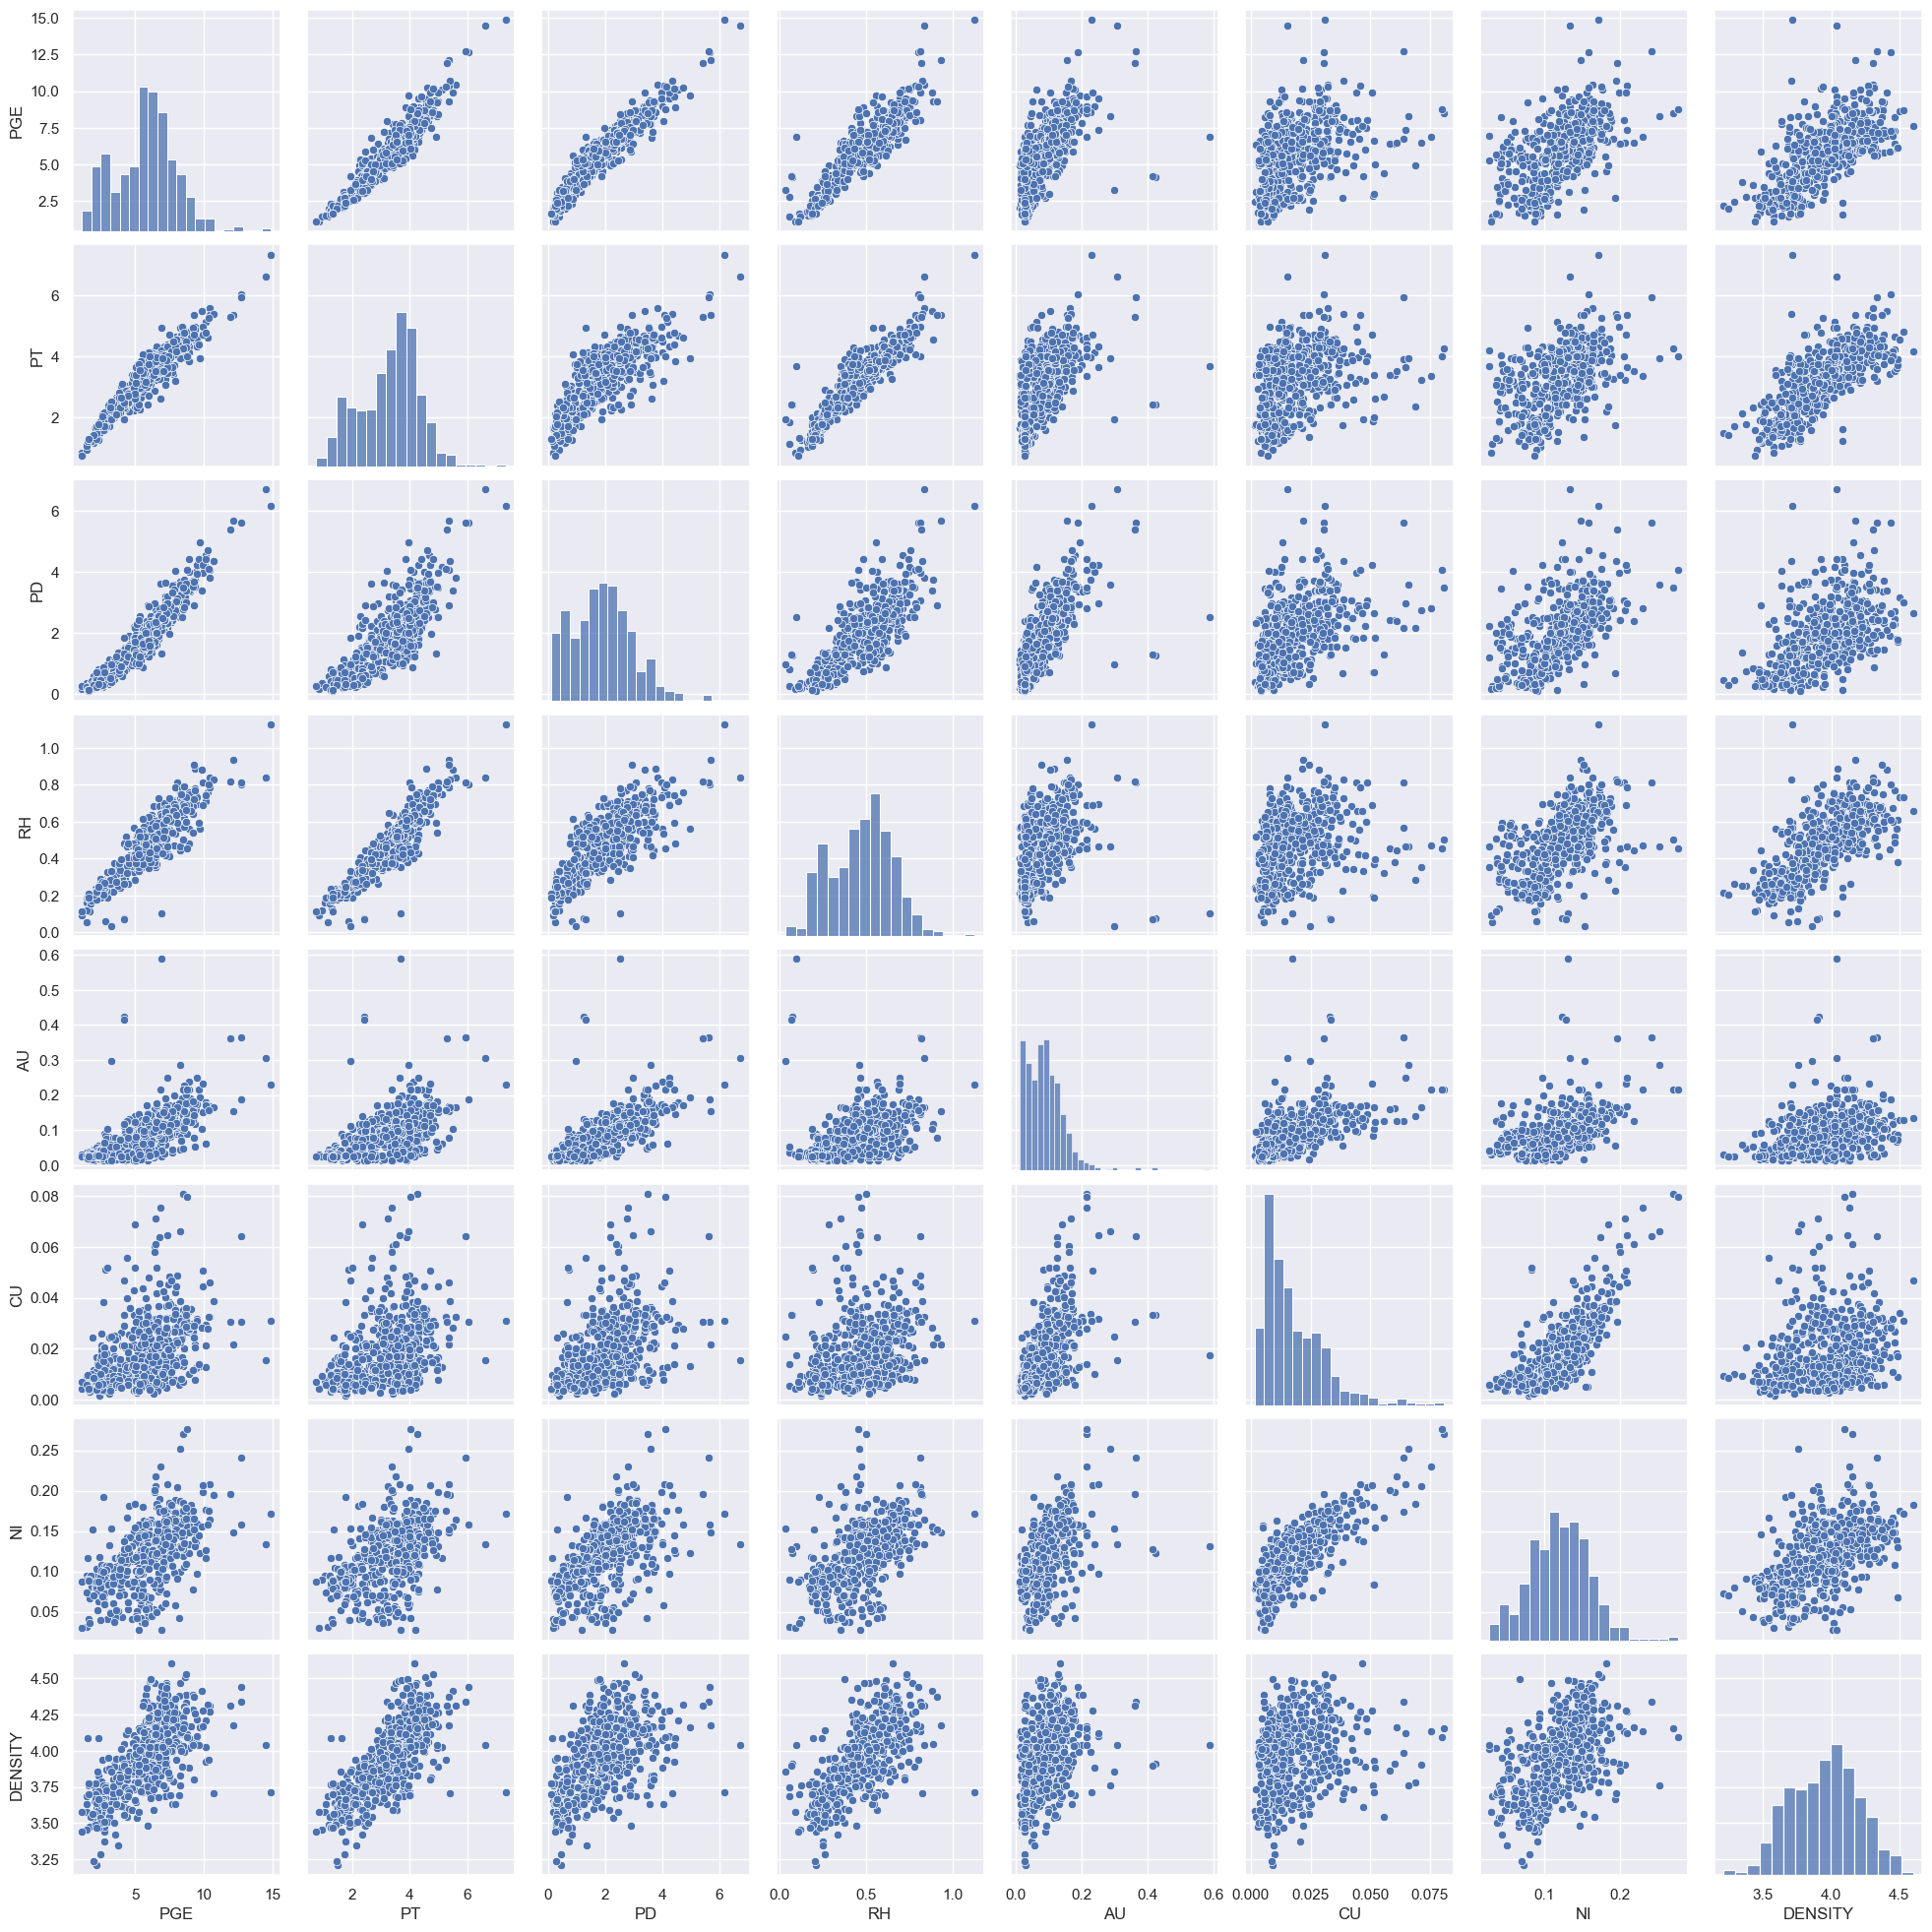

In [42]:
pair = sns.pairplot(pge_comp)
sns.despine(top=False,right=False)